# Encontrar las raíces de una función

Sacar raices nos sirve para caracterizar trayectorias en un sistema dinámico. 

Existen dos métodos para encontrar raíces, el de bipartición y el de Newton. 

### Método de Bipartición o Bisección

Lo que vamos haciendo es que tienes una función y vas haciendo promedios con otro punto en la función, entonces sacas el promedio entre esos dos puntos. Luego le preguntas a la computadora si el resultado está por arriba o por abajo del cero (que es lo que queremos), si está por arriba tomamos los puntos anteriores y hacemos el promedio entre ellos, si está por abajo tomamos el punto original y otro para hacer el promedio. 

Haciendo este método recursivo de sacar promedios y luego ver si está por arriba o por abajo n veces nos va a dar como resultado que: 
$$
\lim_{x\to\infty} x_n = x_r
$$

Donde $x_r$ es nuestra raíz :)

In [19]:
from pylab import *
%matplotlib inline

In [20]:
def raiz_bip(func,x_i,x_d,err=1e-5): #(la función, punto ancla izquiero, punto ancla derecho, error)
    raiz = 0.5*(x_i+x_d)
    y_i,y_d = func(x_i),func(x_d)
    #n=0
    while abs(raiz-x_d) >=err and abs(y_i-y_d)>=err:
        y_m = func(raiz)
        if y_m == 0 :
            print "Rich sice: chin, le atiné a la raíz" 
            break #por si le atina a la raíz... que es raro #PAULOHARÍA
        if y_m*y_i < 0:
            x_d = raiz
        else:
            x_i = raiz
        raiz = 0.5*(x_i+x_d)
        y_i,y_d = func(x_i),func(x_d)
        #n += 1
        #print "paso"   ,n,   "raíz"  ,raiz
        
    return raiz

#### Prueba con Sen(x)

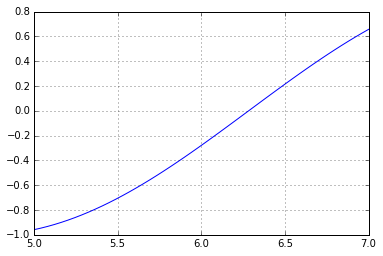

In [21]:
x=linspace(5,7)
plot(x,sin(x))
grid(True)
show()

In [22]:
print "La raíz es:", raiz_bip(sin,5,7,1e-10)
print "2pi        ",2*pi
print "QUE IMPRESIONANTE !!"
print "El error es de:" ,2*pi-raiz_bip(sin,5,7,1e-10)

La raíz es: 6.28318530723
2pi         6.28318530718
QUE IMPRESIONANTE !!
El error es de: -4.79545292364e-11


#### Prueba con el Coseno

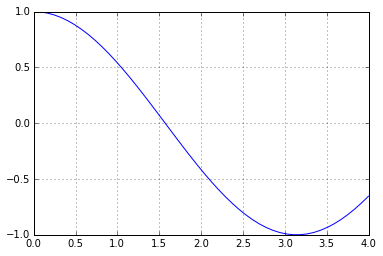

In [23]:
x=linspace(0,4)
plot(x,cos(x))
grid(True)
show()

In [24]:
print raiz_bip(cos,0,4)
print 0.5*pi

1.57079315186
1.57079632679


Por muy bonito que sea este algoritmo, no va a funcionar para las funciones que no crucen el cero (sean totalmente negativas o positivas)... porque le  va a hacer falta los puntos de signos intercambiados. Para eso, nos va a funcionar el método de Newton.

### Método de Newton

Si se tiene una función diferenciable $f(x)$ de la cual se desea encontrar una raíz. Partiendo de un punto inicial $x_0$ se aproxima la función como una recta tangente en ese punto. Sabemos que la derivada al evaluarla en ese punto da la pendiente dela recta tangente. La recta está dada por $y(x)=f'(x_0) x + b$. Para hallar $b$ recordamos que la recta debe cumplir que, en $x_0$, $f(x_0)=f'(x_0) x_0 + b \Rightarrow b = f(x_0) - f'(x_0) x_0$. Sustituyendo, se tiene que:

$$y(x)=f'(x_0) x + - f'(x_0) x_0 -f(x_0) =f'(x_0)(x-x_0)-f(x_0)$$

Entonces, si $x_1$ es tal que $y(x_1)=0$ se tiene que: $x_1=x_0+f(x_0)/f'(x_0)$. Al aplicarlo de manera iterada se obtiene:

$$x_{n+1}=x_n+\frac{f(x_n)}{f'(x_n)}$$, lo cual es válido si la derivada no es cero. Esto nos permite acercarnos a la raíz de manera iterada. Sin embargo, este método es sensible a condiciones iniciales, por lo que la raíz a la que converge puede variar según la condición inicial $x_0$.

In [2]:
import numpy as np

In [3]:
def newton(fun,der,x0,err,n=20):
    x=np.zeros(n+1)
    x[0]=x0
    i=0
    while (i<n and abs(fun(x[i]))>err):
        x[i+1]=x[i]-fun(x[i])/der(x[i])
    return x    

In [18]:
def prueba(x):
    (np.tan(np.sqrt(np.pi-8*x)))**3+x**2
    
def derp(x):
    2*x-12*(np.tan(np.sqrt(np.pi-8*x)))**2*((np.tan(np.sqrt(np.pi-8*x)))**2+1)

In [23]:
miNewton(prueba,0, 0.00000001, 1e-20)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [16]:
def derivada(fun, x, h = 0.0001): #derivada compleja
    return np.imag(fun(x+1j*h)/h)

In [8]:
def miNewton(fun, x_inicial, h = 0.0001, err = 1e-8):
    eps = 1.
    n_iter,nmax = 0.,100.
    
    
    while eps >= err and n_iter <= nmax:
        y = x_inicial - fun(x_inicial)/ derivada(fun, x_inicial, h)
        eps = abs(y-x_inicial)
        x_inicial = y
        #print n_iter,eps, x_inicial
        n_iter += 1.
    print "Se necesitaron", n_iter-1, "pasos para alcanzar un error menor a", err, "."
    return x_inicial

In [14]:
def test(x):
    return (x-1)**5

def test2(x):
    return np.tan(np.sqrt(np.pi-8*x))**3 + x**2

In [17]:
miNewton(test2,0, 0.00000001, 1e-20)

Se necesitaron 100.0 pasos para alcanzar un error menor a 1e-20 .


-0.45649040060030305